# Kalman Filter tracking a sine wave

This example shows how to use the Kalman Filter for state estimation.

In this example, we generate a fake target trajectory using a sine wave.
Instead of observing those positions exactly, we observe the position plus some
random noise.  We then use a Kalman Filter to estimate the velocity of the
system as well.

The figure drawn illustrates the observations, and the position and velocity
estimates predicted by the Kalman Smoother.

In [2]:
import numpy as np
import pylab as pl

from pykalman import KalmanFilter

Create a reproducible random number generator with seed=0

In [3]:
rnd = np.random.RandomState(0)

Generate a noisy sine wave to act as our fake observations.

In [4]:
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
observations = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))

Create a Kalman Filter by hinting at the size of the state and observation space. If you already have good guesses for the initial parameters, put them in here. The Kalman Filter will try to learn the values of all variables.

In [5]:
kf = KalmanFilter(
    transition_matrices=np.array([[1, 1], [0, 1]]),
    transition_covariance=0.01 * np.eye(2),
)

You can use the Kalman Filter immediately without fitting, but its estimates may not be as good as if you fit first.

In [8]:
states_pred = kf.em(observations).smooth(observations)[0]

Plot lines for the observations without noise, the estimated position of the target before fitting, and the estimated position after fitting.

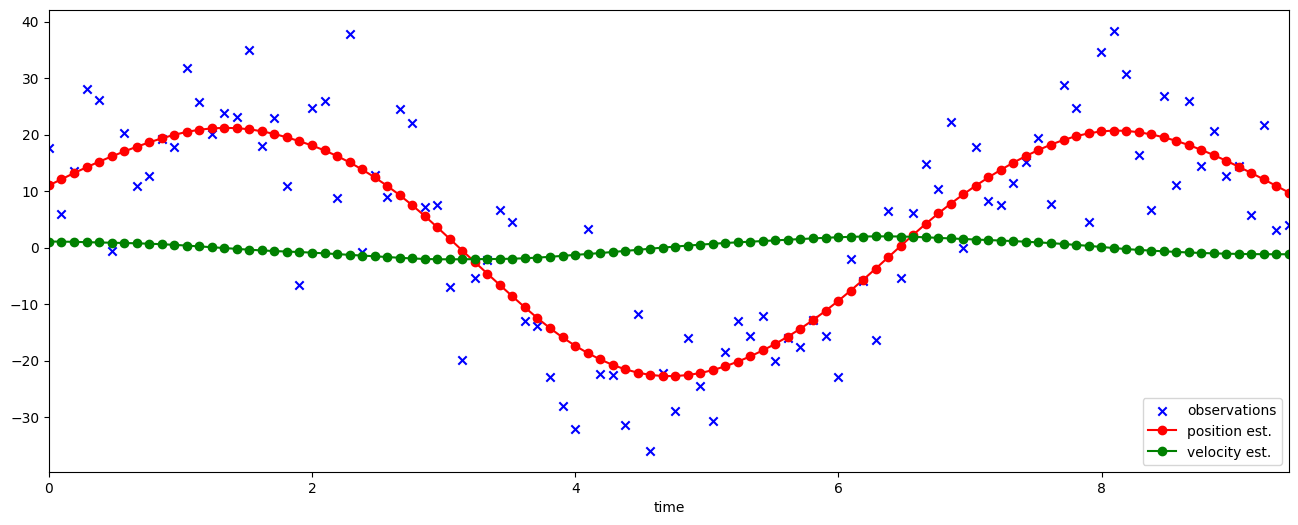

In [7]:
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, observations, marker="x", color="b", label="observations")
position_line = pl.plot(
    x, states_pred[:, 0], linestyle="-", marker="o", color="r", label="position est."
)
velocity_line = pl.plot(
    x, states_pred[:, 1], linestyle="-", marker="o", color="g", label="velocity est."
)
pl.legend(loc="lower right")
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel("time")
pl.show()